In [1]:
# Load libraries
%matplotlib inline
import numpy as np
import pandas as pd
from __future__ import division
import string
import math
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import sklearn
import _pickle as cPickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve
##tokenize = lambda doc: doc.lower().split(" ")

In [2]:
# Load dataset
TwtDs = pd.read_csv('C:\\Users\\Meng\\OneDrive\\Documents\\tamu\\DataScience\\twitter-user-gender-classification\\gender-classifier-DFE-791531.csv',  na_values=['.'], encoding = "ISO-8859-1")

In [4]:
# shape
print(TwtDs.shape) 

(20050, 26)


In [5]:
# head
print(TwtDs.head(10))

    _unit_id _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226   False   finalized                   3    10/26/15 23:24   
1  815719227   False   finalized                   3    10/26/15 23:30   
2  815719228   False   finalized                   3    10/26/15 23:33   
3  815719229   False   finalized                   3    10/26/15 23:10   
4  815719230   False   finalized                   3     10/27/15 1:15   
5  815719231   False   finalized                   3     10/27/15 1:47   
6  815719232   False   finalized                   3     10/27/15 1:57   
7  815719233   False   finalized                   3    10/26/15 23:48   
8  815719234   False   finalized                   3     10/27/15 1:52   
9  815719235   False   finalized                   3     10/27/15 1:49   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male             1.0000        yes                    1.0   
1    male             1.0000        yes              

In [6]:
# Add a text length column to the dataset
TwtDs['txtlength'] = TwtDs['text'].map(lambda text: len(text))

In [7]:
# Dataset Info
TwtDs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 27 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [8]:
TwtDs.groupby('gender').describe()

_trusted_judgments      _unit_id     fav_number  \
gender                                                           
brand   count         5942.000000  5.942000e+03    5942.000000   
        mean             3.578930  8.157288e+08    2109.262033   
        std             11.939691  5.544367e+03   10566.434142   
        min              3.000000  8.157192e+08       0.000000   
        25%              3.000000  8.157247e+08       0.000000   
        50%              3.000000  8.157280e+08       8.000000   
        75%              3.000000  8.157329e+08     367.750000   
        max            273.000000  8.157566e+08  248255.000000   
female  count         6700.000000  6.700000e+03    6700.000000   
        mean             3.552687  8.157301e+08    6008.320149   
        std             11.689037  6.153329e+03   13679.838005   
        min              3.000000  8.157192e+08       0.000000   
        25%              3.000000  8.157245e+08     200.750000   
        50%              3.000000  8.157308e+08    1509.000000   
        75%              3.000000  8.157353e+08    5902.000000   
        max            274.000000  8.157580e+08  341621.000000   
male    count         6194.000000  6.194000e+03    6194.000000   
        mean             3.839845  8.157294e+08    4898.770100   
        std             14.409756  6.207570e+03   12458.063198   
        min              3.000000  8.157192e+08       0.000000   
        25%              3.000000  8.157236e+08      95.000000   
        50%              3.000000  8.157296e+08     831.500000   
        75%              3.000000  8.157347e+08    4071.500000   
        max            264.000000  8.157578e+08  259583.000000   
unknown count         1117.000000  1.117000e+03    1117.000000   
        mean             3.000000  8.157293e+08    3708.038496   
        std              0.000000  5.818659e+03   10442.593095   
        min              3.000000  8.157192e+08       0.000000   
        25%              3.000000  8.157247e+08       0.000000   
        50%              3.000000  8.157287e+08     118.000000   
        75%              3.000000  8.157344e+08    2175.000000   
        max              3.000000  8.157396e+08  131431.000000   

               gender:confidence  profile_yn:confidence  retweet_count  \
gender                                                                   
brand   count        5942.000000            5942.000000    5942.000000   
        mean            0.868107               0.994151       0.116123   
        std             0.184168               0.043814       4.315528   
        min             0.314000               0.627200       0.000000   
        25%             0.673500               1.000000       0.000000   
        50%             1.000000               1.000000       0.000000   
        75%             1.000000               1.000000       0.000000   
        max             1.000000               1.000000     330.000000   
female  count        6700.000000            6700.000000    6700.000000   
        mean            0.926360               0.994947       0.046716   
        std             0.155159               0.040888       0.730049   
        min             0.322300               0.631000       0.000000   
        25%             1.000000               1.000000       0.000000   
        50%             1.000000               1.000000       0.000000   
        75%             1.000000               1.000000       0.000000   
        max             1.000000               1.000000      49.000000   
male    count        6194.000000            6194.000000    6194.000000   
        mean            0.905113               0.994725       0.088957   
        std             0.175139               0.041813       2.064047   
        min             0.320600               0.630800       0.000000   
        25%             1.000000               1.000000       0.000000   
        50%             1.000000               1.000000       0.0000

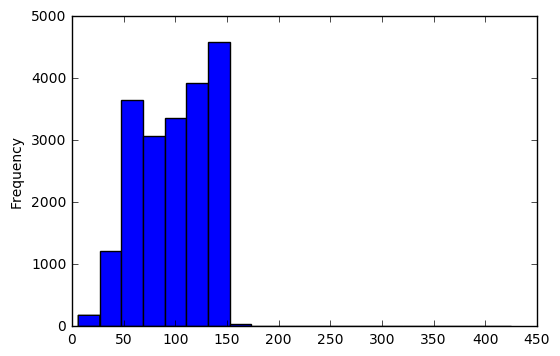

In [9]:
# Plot historgram of tweet length
TwtDs.txtlength.plot(bins=20, kind='hist')

In [10]:
TwtDs.txtlength.describe()

count    20050.000000
mean        97.661796
std         33.931645
min          6.000000
25%         68.000000
50%        102.000000
75%        130.000000
max        425.000000
Name: txtlength, dtype: float64

In [11]:
# check the longest tweet in the dataset
print (list(TwtDs.text[TwtDs.txtlength > 400]))

['When You A Trap Wife and Everybody wants you _Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷__Ù÷_']


In [12]:
# check the shortest tweet in the dataset
print (list(TwtDs.text[TwtDs.txtlength < 10]))

['#NAME?', 'The end.', 'And fever']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000159CAEA65C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000159CAE57D68>]], dtype=object)

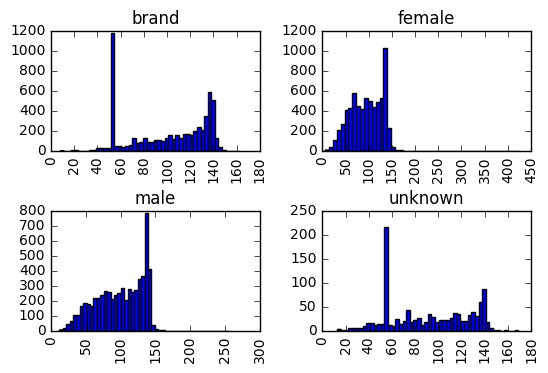

In [13]:
# check the tweet length by gender
TwtDs.hist(column='txtlength', by='gender', bins=50)

In [14]:
# gender distribution
print(TwtDs.groupby('gender').size())

gender
brand      5942
female     6700
male       6194
unknown    1117
dtype: int64


In [15]:
def split_into_tokens(text):
     #message = unicode(message, 'utf8')  # convert bytes into proper unicode
    return TextBlob(text).words

In [16]:
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

In [17]:
# get a larger portion of the dataset to do the validation
TwtTop1000 = TwtDs.head(1000)

In [18]:
# check for null values
TwtTop1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
_unit_id                 1000 non-null int64
_golden                  1000 non-null bool
_unit_state              1000 non-null object
_trusted_judgments       1000 non-null int64
_last_judgment_at        1000 non-null object
gender                   994 non-null object
gender:confidence        999 non-null float64
profile_yn               1000 non-null object
profile_yn:confidence    1000 non-null float64
created                  1000 non-null object
description              879 non-null object
fav_number               1000 non-null int64
gender_gold              0 non-null object
link_color               1000 non-null object
name                     1000 non-null object
profile_yn_gold          0 non-null object
profileimage             1000 non-null object
retweet_count            1000 non-null int64
sidebar_color            1000 non-null object
text                     1000 non

In [19]:
# Noticed that there were null values, so only select none null values into the dataset
TwtTop994 = TwtTop1000[TwtTop1000['gender'].notnull()]

In [20]:
TwtTop994.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 27 columns):
_unit_id                 994 non-null int64
_golden                  994 non-null bool
_unit_state              994 non-null object
_trusted_judgments       994 non-null int64
_last_judgment_at        994 non-null object
gender                   994 non-null object
gender:confidence        994 non-null float64
profile_yn               994 non-null object
profile_yn:confidence    994 non-null float64
created                  994 non-null object
description              873 non-null object
fav_number               994 non-null int64
gender_gold              0 non-null object
link_color               994 non-null object
name                     994 non-null object
profile_yn_gold          0 non-null object
profileimage             994 non-null object
retweet_count            994 non-null int64
sidebar_color            994 non-null object
text                     994 non-null object
twe

In [21]:
# Createbag of words from the 994 tweets from the top of the dataset
topbow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(TwtTop994['text'])
print (len(topbow_transformer.vocabulary_))

4866


In [22]:
Twt994_bow = topbow_transformer.transform(TwtTop994['text'])
print ('sparse matrix shape:', Twt994_bow.shape)
print ('number of non-zeros:', Twt994_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * Twt994_bow.nnz / (Twt994_bow.shape[0] * Twt994_bow.shape[1])))

sparse matrix shape: (994, 4866)
number of non-zeros: 15086
sparsity: 0.31%


In [23]:
#Carry out the real evaluation (cross validations) with this 994 tweets
twt_train, twt_test, label_train, label_test = \
    train_test_split(TwtTop994['text'], TwtTop994['gender'], test_size=0.6)

print (len(twt_train), len(twt_test), len(twt_train) + len(twt_test))

397 597 994


In [24]:
# gender distribution in the sample
print(TwtTop994.groupby('gender').size())

gender
brand      281
female     326
male       337
unknown     50
dtype: int64


In [25]:
twt_train.head()

735    I liked a @YouTube video from @DIRENGREY_web h...
138    #business Gala Bingo clubs bought for å£241m: ...
693    The tackles against our players, you'd swear s...
431    Blog me!  https://t.co/wk8hXd0hST  Even fat ca...
181    #biz Holiday Candy Course: Learn the art of go...
Name: text, dtype: object

In [26]:
# Create bag of words from the 397 tweets of the training set
trnbow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(twt_train)
print (len(trnbow_transformer.vocabulary_))

2417


In [27]:
train_bow = trnbow_transformer.transform(twt_train)
trn_tfidf_transformer = TfidfTransformer().fit(train_bow)
twt_train_tfidf = trn_tfidf_transformer.transform(train_bow)
print (twt_train_tfidf.shape)

(397, 2417)


In [28]:
%time twt_gender_detector = MultinomialNB().fit(twt_train_tfidf,  label_train)

Wall time: 6 ms


In [29]:
# Use the bow from training to creat tfidf for the test portion of the tweets
test_bow = trnbow_transformer.transform(twt_test)
tst_tfidf_transformer = TfidfTransformer().fit(test_bow)
twt_test_tfidf = tst_tfidf_transformer.transform(test_bow)
print (twt_test_tfidf.shape)

(597, 2417)


In [30]:
test_predictions = twt_gender_detector.predict(twt_test_tfidf)
print (test_predictions)

['brand' 'female' 'female' 'brand' 'female' 'female' 'brand' 'male' 'male'
 'female' 'brand' 'female' 'brand' 'male' 'female' 'male' 'female' 'brand'
 'brand' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'brand' 'male' 'male' 'brand' 'male' 'female' 'male' 'male' 'brand'
 'female' 'female' 'brand' 'female' 'brand' 'male' 'male' 'male' 'brand'
 'female' 'female' 'female' 'brand' 'female' 'female' 'female' 'male'
 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'brand' 'male'
 'brand' 'female' 'female' 'female' 'female' 'male' 'female' 'brand' 'male'
 'female' 'female' 'brand' 'male' 'female' 'female' 'female' 'male' 'male'
 'female' 'brand' 'male' 'female' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'brand' 'male' 'female'
 'brand' 'male' 'male' 'brand' 'female' 'male' 'female' 'female' 'brand'
 'female' 'brand' 'female' 'female' 'female' 'm

In [31]:
print ('accuracy', accuracy_score(label_test, test_predictions))
print ('confusion matrix\n', confusion_matrix(label_test, test_predictions))
print ('(row=expected, col=predicted)')

accuracy 0.428810720268
confusion matrix
 [[ 62  49  41   0]
 [ 27 126  46   0]
 [ 41 102  68   0]
 [  2  19  14   0]]
(row=expected, col=predicted)


In [32]:
print (classification_report(label_test, test_predictions))

             precision    recall  f1-score   support

      brand       0.47      0.41      0.44       152
     female       0.43      0.63      0.51       199
       male       0.40      0.32      0.36       211
    unknown       0.00      0.00      0.00        35

avg / total       0.40      0.43      0.41       597



C:\Users\Meng\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
#pipeline = Pipeline([
#    ('bow', CountVectorizer(analyzer=split_into_lemmas)),  # strings to token integer counts
#    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
#])

In [34]:
#A common practice is to partition the training set again, into smaller subsets; for example, 5 equally sized subsets
#scores = cross_val_score(pipeline,  # steps to convert raw messages into models
#                         twt_train,  # training data
#                         label_train,  # training labels
#                         cv=5,  # split data randomly into 5 parts: 4 for training, 1 for scoring
#                         scoring='accuracy',  # which scoring metric?
#                         n_jobs=-1,  # -1 = use all cores = faster
#                         )
#print (scores)